<a href="https://colab.research.google.com/github/shanazaja/Weather-KNN/blob/main/Weather_Modul_4_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

url = '/content/Project1WeatherDataset.csv'
data = pd.read_csv(url)

data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [ ]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['Date/Time_encoded'] = label_encoder.fit_transform(data['Date/Time'])
data.head()

#pengubahan data dri string ke integer

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date/Time_encoded
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,11
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",16
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",17
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,18


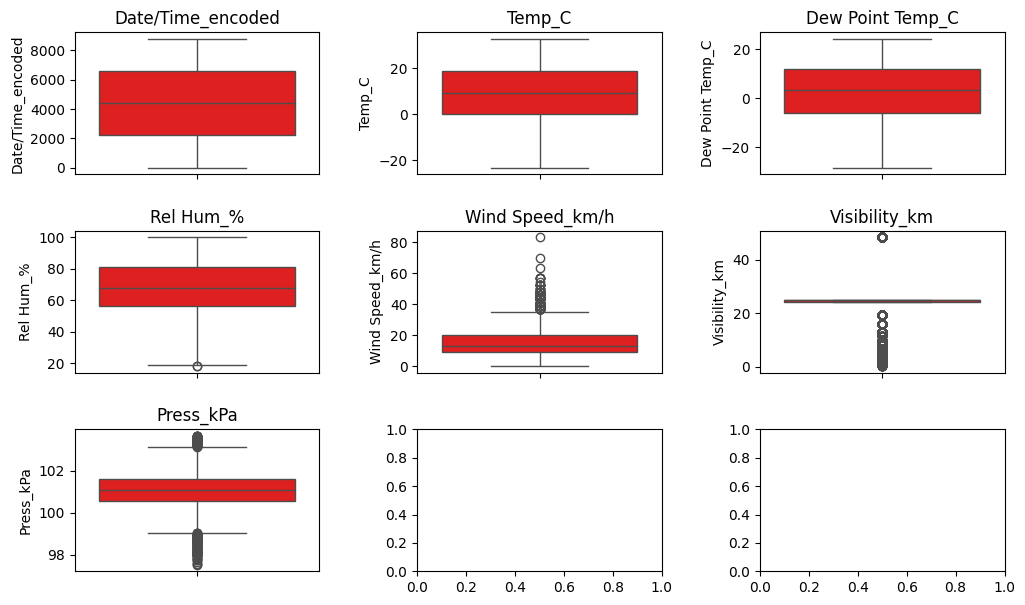

In [ ]:
def box_plot(data):
    # Variabel yang akan divisualisasikan
    variables = ['Date/Time_encoded', 'Temp_C',
                 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

    # Membuat figure dan axes untuk subplot dengan ukuran 3x2
    fig, axes = plt.subplots(3, 3, figsize=(12, 7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        row, col = i // 3, i % 3  # Tentukan posisi subplot
        sns.boxplot(y=var, data=data, color="red", ax=axes[row, col])
        axes[row, col].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Memanggil fungsi box_plot dengan data contoh
box_plot(data)

#mencari outlier/data yang melebihi range/standar

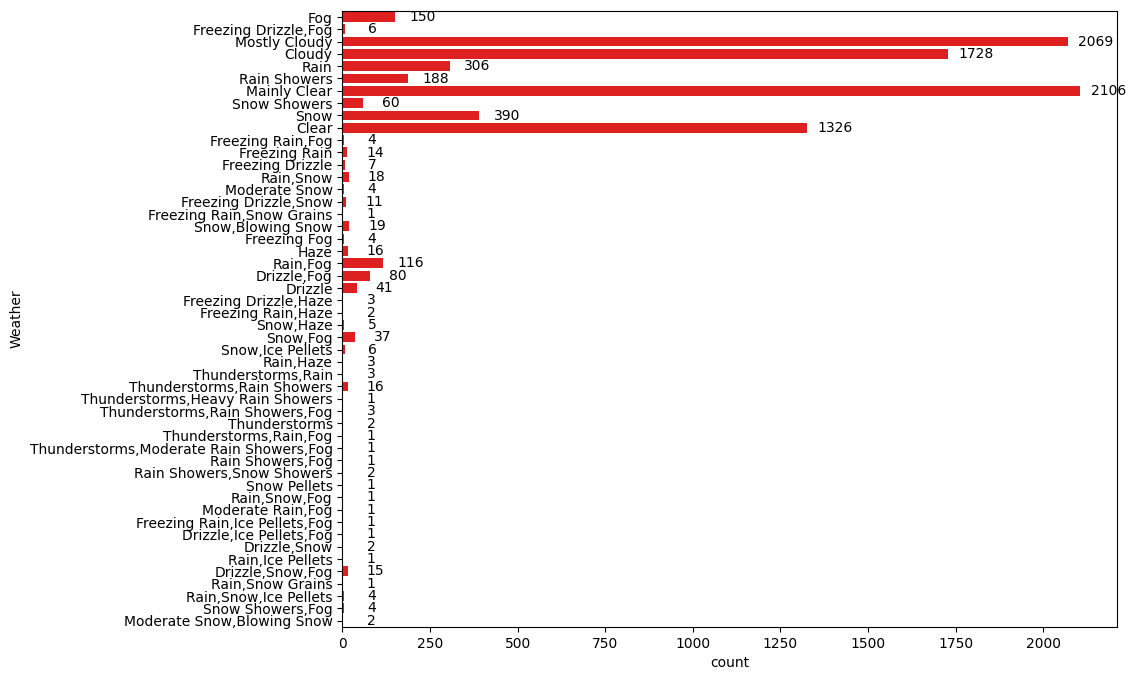

In [ ]:
# Atur ukuran canvas
plt.figure(figsize=(10,8))

# Buat countplot dengan orientasi horizontal
plot = sns.countplot(y='Weather', data=data, color='red')

# Menambahkan label pada masing-masing bar
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() /2),
                  ha = 'center', va = 'center',
                  xytext = (20,0),
                  textcoords = 'offset points')
# Menampilkan plot
plt.show()

#penyebaran data bukan angka

<Axes: >

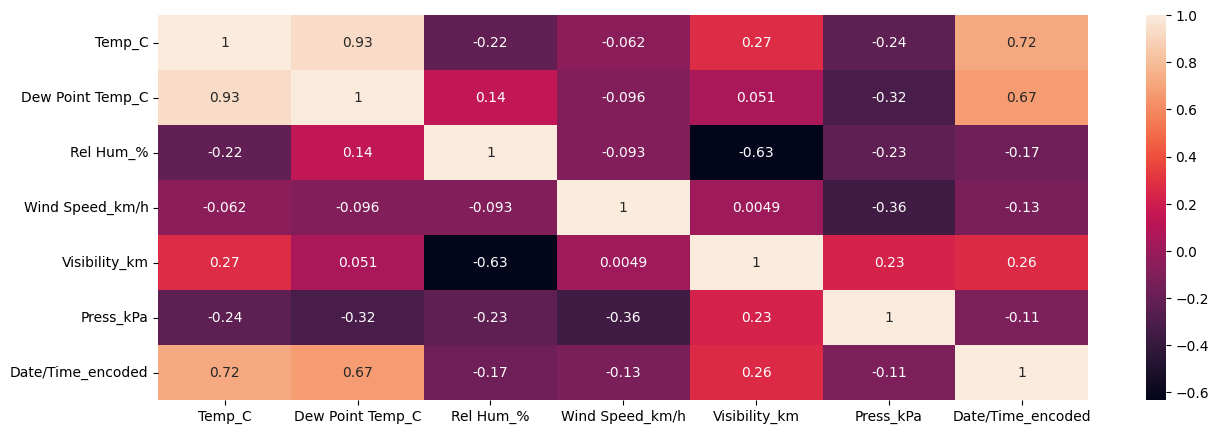

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 5))
sns.heatmap(numeric_data.corr(), annot=True)

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['Weather_encoded'] = label_encoder.fit_transform(data['Weather'])
data.head()

#pengubahan data dri string ke integer

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date/Time_encoded,Weather_encoded
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,7
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,11,7
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",16,9
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",17,9
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,18,7


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['Temp_C'] = label_encoder.fit_transform(data['Temp_C'])
data['Dew Point Temp_C'] = label_encoder.fit_transform(data['Dew Point Temp_C'])
data['Visibility_km'] = label_encoder.fit_transform(data['Visibility_km'])
data['Press_kPa'] = label_encoder.fit_transform(data['Press_kPa'])
data.head()

#pengubahan data dri string ke integer

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date/Time_encoded,Weather_encoded
0,1/1/2012 0:00,186,224,86,4,15,297,Fog,0,7
1,1/1/2012 1:00,186,226,87,4,15,297,Fog,11,7
2,1/1/2012 2:00,186,229,89,7,12,299,"Freezing Drizzle,Fog",16,9
3,1/1/2012 3:00,189,231,88,6,12,300,"Freezing Drizzle,Fog",17,9
4,1/1/2012 4:00,189,230,88,7,13,296,Fog,18,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date/Time          8784 non-null   object
 1   Temp_C             8784 non-null   int64 
 2   Dew Point Temp_C   8784 non-null   int64 
 3   Rel Hum_%          8784 non-null   int64 
 4   Wind Speed_km/h    8784 non-null   int64 
 5   Visibility_km      8784 non-null   int64 
 6   Press_kPa          8784 non-null   int64 
 7   Weather            8784 non-null   object
 8   Date/Time_encoded  8784 non-null   int64 
 9   Weather_encoded    8784 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 686.4+ KB


In [ ]:
#Variabel x
x = data[['Date/Time_encoded', 'Temp_C',
                 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]

#Variabel y
y = data['Weather_encoded']

#membagi antara dua variabel yaitu x dan y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
hasil_sc = sc.fit_transform(x)
hasil_sc

array([[-1.73185364, -0.90859195, -0.59367068, ..., -1.25980838,
        -1.82957149,  0.2250794 ],
       [-1.72751562, -0.90859195, -0.57528008, ..., -1.25980838,
        -1.82957149,  0.2250794 ],
       [-1.7255438 , -0.90859195, -0.54769417, ..., -0.91451252,
        -2.76516235,  0.2491156 ],
       ...,
       [-0.6288149 , -0.79720201, -0.37298342, ...,  1.5025585 ,
        -2.45329873, -1.32525538],
       [-0.62842053, -0.77149664, -0.40056933, ...,  1.5025585 ,
        -1.51770787, -1.37332778],
       [-0.62802617, -0.75435973, -0.42815523, ...,  1.73275574,
        -1.20584426, -1.39736398]])

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
# Menerapkan regresi linier sederhana
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
coef_df = pd.DataFrame(regressor.coef_, x.columns,
columns=['Coefficient'])
print("Intercept:", regressor.intercept_)
print(coef_df)

Intercept: 41.949848258697024
                   Coefficient
Date/Time_encoded    -0.000053
Temp_C               -0.012657
Dew Point Temp_C      0.015811
Rel Hum_%            -0.101547
Wind Speed_km/h       0.129246
Visibility_km        -0.902880
Press_kPa            -0.015159


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=5.0)
ridge_model.fit(x_train, y_train)

Ridge(alpha=5.0)

In [ ]:
y_pred1 = ridge_model.predict(x_test)

In [ ]:
coefficients = ridge_model.coef_

for i, column_name in enumerate(x.columns):
  print(f'{column_name}: {coefficients[i]}')

Date/Time_encoded: -5.257247039724735e-05
Temp_C: -0.012640138776167185
Dew Point Temp_C: 0.015793281562084416
Rel Hum_%: -0.10149534635968044
Wind Speed_km/h: 0.12924727079861298
Visibility_km: -0.9027600909724686
Press_kPa: -0.01515936698543786


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=5.0)
lasso_model.fit(x_train, y_train)

Lasso(alpha=5.0)

In [ ]:
y_pred2 = lasso_model.predict(x_test)

In [ ]:
coefficients = lasso_model.coef_

for i, column_name in enumerate(x.columns):
  print(f'{column_name}: {coefficients[i]}')

Date/Time_encoded: -0.000117068177044605
Temp_C: 0.0007179441248105401
Dew Point Temp_C: -0.0016556188752080284
Rel Hum_%: -0.0
Wind Speed_km/h: 0.06506204133454153
Visibility_km: -0.16991577277663192
Press_kPa: -0.02099538382059947


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae) #seberapa besar kesalahan prediksi

Mean Absolute Error (MAE): 9.959335084818203


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  mape = mean_absolute_percentage_error(y_test, y_pred)
  print("Mean Absolute Percentage Error (MAPE):", mape) #dalam bentuk presentase

In [ ]:
# Hitung MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse) #dalam bentuk kuadrat

Mean Squared Error (MSE): 117.98088492279858


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse) #dalam satuan yg sama dgn data asli

Root Mean Squared Error (RMSE): 10.861900612820879


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2) #mengukur seberapa baik model prediksi dgn data yang sbnrnya

R-squared (R2) Score: 0.10924404683711175


KNN

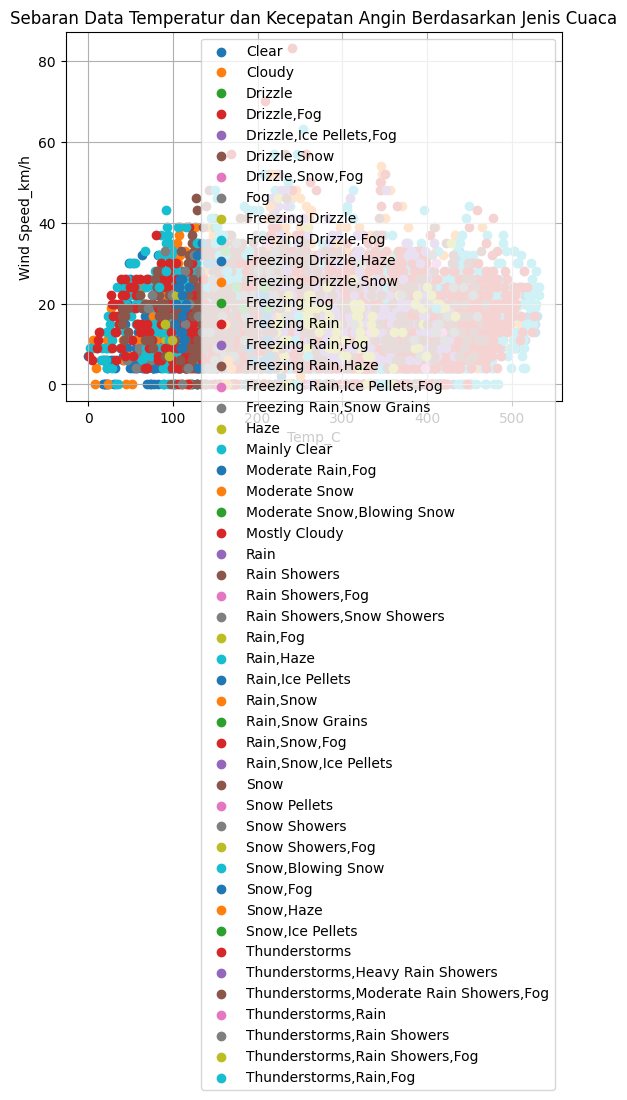

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for weather, d in data.groupby('Weather'):
    ax.scatter(d['Temp_C'], d['Wind Speed_km/h'], label=weather)

plt.legend(loc='upper right')
plt.title("Sebaran Data Temperatur dan Kecepatan Angin Berdasarkan Jenis Cuaca")
plt.xlabel('Temp_C')
plt.ylabel('Wind Speed_km/h')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

X_train_weather = np.array(data[[ 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']])
y_train_weather = np.array(data['Weather'])

print(f'X_train_weather:\n{X_train_weather}\n')
print(f'y_train_weather: {y_train_weather}')

X_train_weather:
[[186 224  86   4  15 297]
 [186 226  87   4  15 297]
 [186 229  89   7  12 299]
 ...
 [199 248  93  28  13 168]
 [202 245  89  28  16 164]
 [204 242  86  30  17 162]]

y_train_weather: ['Fog' 'Fog' 'Freezing Drizzle,Fog' ... 'Snow' 'Snow' 'Snow']


In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(f'y_train:\n{y_train}')

#pengubahan data dri string ke integer

y_train:
[ 0 18  1 ... 18 22  1]


In [ ]:
import numpy as np

# Membentuk kembali y_train menjadi array 2 dimensi dengan satu kolom
y_train_reshaped = y_train.reshape(-1, 1)

# Menampilkan hasil
print("y_train yang sudah diubah:\n", y_train_reshaped)

y_train yang sudah diubah:
 [[ 0]
 [18]
 [ 1]
 ...
 [18]
 [22]
 [ 1]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train_weather: {y_train_weather}')

y_train_weather: ['Fog' 'Fog' 'Freezing Drizzle,Fog' ... 'Snow' 'Snow' 'Snow']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_weather, y_train_weather)

KNeighborsClassifier()

In [ ]:
temperature_C = -1.8
dew_point_temp_C = -3.4
relative_humidity_percent = 89
wind_speed_kmh = 10
visibility_km = 8.0
pressure_kPa = 101.24

# Buat array baru dari data cuaca
X_new = np.array([temperature_C, dew_point_temp_C, relative_humidity_percent, wind_speed_kmh, visibility_km, pressure_kPa]).reshape(1, -1)
X_new

array([[ -1.8 ,  -3.4 ,  89.  ,  10.  ,   8.  , 101.24]])

In [ ]:
y_new = model.predict(X_new)
y_new

array(['Clear'], dtype=object)

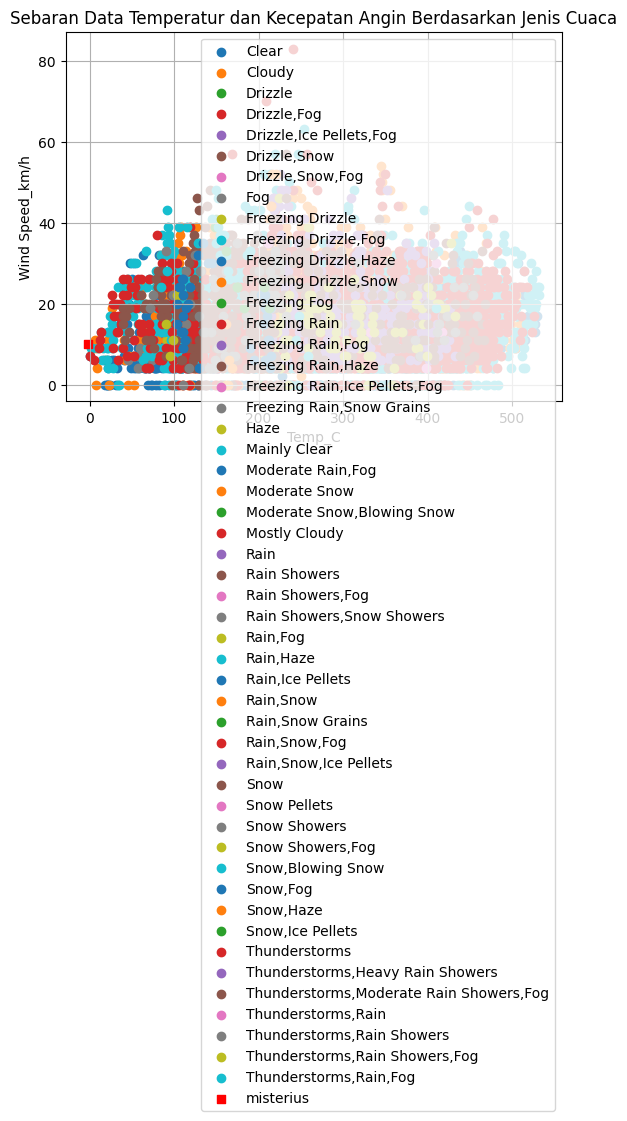

In [ ]:
fig, ax = plt.subplots()
for weather, d in data.groupby('Weather'):
    ax.scatter(d['Temp_C'], d['Wind Speed_km/h'], label=weather)

# Menambahkan data "misterius"
plt.scatter(temperature_C,
            wind_speed_kmh,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper right')
plt.title('Sebaran Data Temperatur dan Kecepatan Angin Berdasarkan Jenis Cuaca')
plt.xlabel('Temp_C')
plt.ylabel('Wind Speed_km/h')
plt.grid(True)
plt.show()

In [ ]:
misterius = np.array([temperature_C, dew_point_temp_C, relative_humidity_percent, wind_speed_kmh, visibility_km, pressure_kPa ])
misterius

array([ -1.8 ,  -3.4 ,  89.  ,  10.  ,   8.  , 101.24])

In [ ]:
X_train_weather

array([[186, 224,  86,   4,  15, 297],
       [186, 226,  87,   4,  15, 297],
       [186, 229,  89,   7,  12, 299],
       ...,
       [199, 248,  93,  28,  13, 168],
       [202, 245,  89,  28,  16, 164],
       [204, 242,  86,  30,  17, 162]])

In [ ]:
from scipy.spatial.distance import euclidean
import numpy as np

data_jarak = [euclidean (misterius, d) for d in X_train_weather]
data_jarak

[354.11237990219996,
 355.3929903641883,
 358.34706305479887,
 361.7824451241381,
 358.95216617259746,
 361.6757354316156,
 363.54831535849536,
 359.2414474973622,
 357.5875523560629,
 359.7205826749423,
 363.97046253782736,
 359.701623015521,
 353.5576015305003,
 349.6524811866777,
 348.75237289515326,
 354.0329611773457,
 357.75754024199125,
 359.92807281455555,
 371.62262794399373,
 368.57218777330445,
 367.92349422128507,
 375.71395715357716,
 379.77932750480244,
 386.9186188334699,
 382.9057555064953,
 368.3791763930203,
 356.63821668463964,
 351.11521983531276,
 339.7934925804201,
 337.7398667613878,
 333.25584405978543,
 329.5954756971036,
 326.59512794896375,
 323.60867973526297,
 318.51162867311456,
 326.5305155724347,
 306.87720280268456,
 299.14501098965366,
 296.9418421172739,
 287.5541994129107,
 271.47798732125597,
 257.52440195057244,
 235.0851284109652,
 229.36324378592138,
 218.6090977063855,
 223.47191680387942,
 209.22719134949932,
 209.62570834704414,
 194.093527970

In [ ]:
data['Jarak'] = data_jarak
data.sort_values(['Jarak'])

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date/Time_encoded,Weather_encoded,Jarak
1538,3/5/2012 2:00,60,40,52,24,22,212,Clear,4288,0,140.469134
1011,2/12/2012 3:00,39,24,54,9,22,230,Mainly Clear,3041,19,142.886450
1539,3/5/2012 3:00,55,48,58,22,22,220,Clear,4289,0,145.853137
1012,2/12/2012 4:00,41,25,54,11,22,233,Cloudy,3042,1,146.359481
1014,2/12/2012 6:00,40,30,57,15,22,233,Snow,3044,35,146.521321
...,...,...,...,...,...,...,...,...,...,...,...
4693,7/14/2012 13:00,521,456,47,19,23,310,Mainly Clear,6700,19,728.023995
4692,7/14/2012 12:00,519,460,49,22,23,314,Mainly Clear,6699,19,730.210940
5199,8/4/2012 15:00,530,451,44,17,21,312,Clear,7926,0,732.088367
5202,8/4/2012 18:00,524,464,49,13,21,302,Mostly Cloudy,7929,23,732.810329


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X_test = np.array([[11.0, 11.5, 12.1, 13.7, 14.8, 0.2], [7, 9, 4, 5, 13, 10]])

le = LabelEncoder()
le.fit(['Clear', 'Mostly Cloudy'])

y_test = le.transform(np.array(['Clear', 'Mostly Cloudy'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')

X_test: 
[[11.  11.5 12.1 13.7 14.8  0.2]
 [ 7.   9.   4.   5.  13.  10. ]]

y_test: 
[0 1]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['Snow', 'Snow'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 0, 1]
y_pred = ['No Snow', 'Snow', 'No Snow', 'Snow']
label_mapping = {0: 'No Snow', 1: 'Snow'}

y_true_mapped = [label_mapping[label] for label in y_true]

acc = accuracy_score(y_true_mapped, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 1.0
